In [1]:
tree = Signal('/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/Summer2018UL/bias/NMSSM_nocuts/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

In [2]:
tree.cutflow

array([17922.    , 12604.185 , 10214.106 ,  7736.0317], dtype=float32)

This notebook is intended to explore the purities and efficiencies of various event selection processes.

In [2]:
from matplotlib.ticker import ScalarFormatter

class OOMFormatter(ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

In [7]:
from utils.fileUtils.sr import btag_sorted, NMSSM_MX_700_MY_400

In [8]:
t6_btag = Tree(btag_sorted)

In [9]:
t6_btagbias = Tree(NMSSM_MX_700_MY_400)

In [10]:
t6_btag.get('jet_btag')

<Array [[1, 1, 1, ... 0.979, 0.185, 0.0135]] type='58080 * var * float32'>

In [11]:
nsixb_btag = ak.sum(t6_btag.t6_jet_signalId != -1, axis=1)
nsixb_btag

<Array [4, 4, 5, 5, 6, 5, ... 4, 5, 4, 5, 5, 6] type='58080 * int64'>

In [12]:
t6_btag.cutflow

array([17922.  , 12736.93, 10514.24], dtype=float32)

In [13]:
Ntot = t6_btag.cutflow[0]

In [14]:
t6_btagbias.cutflow

array([17922.    , 12736.93  , 10514.24  , 10365.614 ,  9936.753 ,
        9048.4375,  7935.6445], dtype=float32)

In [15]:
nsixb_btagbias = ak.sum(t6_btagbias.t6_jet_signalId != -1, axis=1)
nsixb_btagbias

<Array [4, 4, 5, 5, 6, 5, ... 6, 5, 4, 5, 5, 6] type='43836 * int64'>

In [16]:
bins = np.arange(8)

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


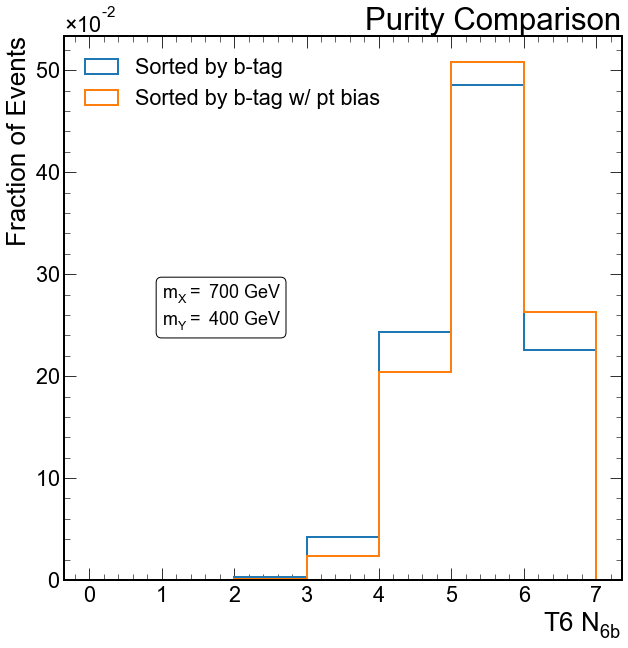

In [17]:
fig, ax = plt.subplots()
ax.set_title('Purity Comparison', loc='right')

n,e = Hist(nsixb_btag, bins=bins, ax=ax, density=1, label='Sorted by b-tag')
n,e = Hist(nsixb_btagbias, bins=bins, ax=ax, density=1, label='Sorted by b-tag w/ pt bias')
ax.legend(loc=2)

ax.text(1,0.25,t6_btag.sample.replace(', ','\n'), fontdict={'fontsize':18}, bbox={'boxstyle':'round', 'facecolor':'white'})

ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax.set_xlabel(r'T6 $N_{6b}$')
ax.set_ylabel('Fraction of Events')

fig.savefig('plots/purity.pdf')

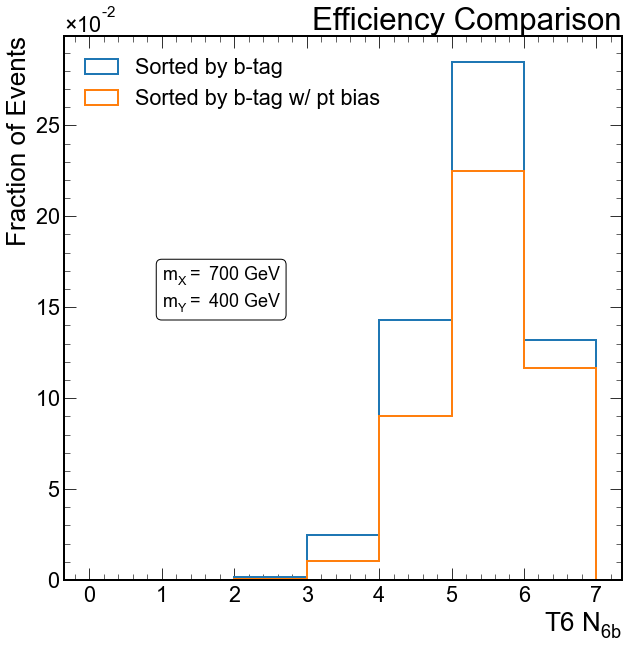

In [21]:
fig, ax = plt.subplots()
ax.set_title('Efficiency Comparison', loc='right')

n,e = np.histogram(nsixb_btag.to_numpy(), bins=bins)
n = n*t6_btag.scale/Ntot
n,e = Hist(x_bins(e), weights=n, bins=bins, ax=ax, label='Sorted by b-tag')

n,e = np.histogram(nsixb_btagbias.to_numpy(), bins=bins)
n = n*t6_btagbias.scale/Ntot
n,e = Hist(x_bins(e), weights=n, bins=bins, ax=ax, label='Sorted by b-tag w/ pt bias')
ax.legend(loc=2)

ax.text(1,0.15,t6_btag.sample.replace(', ','\n'), fontdict={'fontsize':18}, bbox={'boxstyle':'round', 'facecolor':'white'})

ax.yaxis.set_major_formatter(OOMFormatter(-2, "%2.0f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax.set_xlabel(r'T6 $N_{6b}$')
ax.set_ylabel('Fraction of Events')

fig.savefig('plots/efficiency.pdf')